C:\Users\dan37\AppData\Local\Temp/ipykernel_14800/2645367998.py:32: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


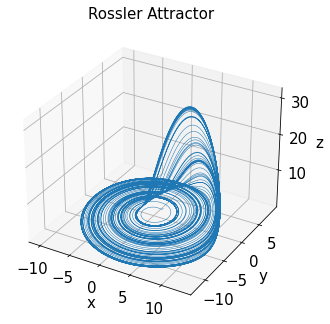

In [1]:
# Program 08a: The Rossler chaotic attractor. See Fig. 8.10(a).
# In this case, iteration is used to solve the ODEs.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Rossler(x, y, z, a=0.2, b=0.2, c=6.3):
    x_dot = -y - z
    y_dot = x + a*y
    z_dot = b + x*z - c*z
    return (x_dot, y_dot, z_dot)

dt = 0.01
step_count = 50000

xs = np.empty([step_count + 1])
ys = np.empty([step_count + 1])
zs = np.empty([step_count + 1])

# The initial conditions
xs[0], ys[0], zs[0] = (1.0, 1.0, 1.0)

# Iterate.
for i in range(step_count):
    x_dot, y_dot, z_dot = Rossler(xs[i], ys[i], zs[i])
    xs[i+1] = xs[i] + (x_dot * dt)
    ys[i+1] = ys[i] + (y_dot * dt)
    zs[i+1] = zs[i] + (z_dot * dt)

fig = plt.figure()
ax = Axes3D(fig)

ax.plot(xs, ys, zs, lw=0.5)
ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Rossler Attractor', fontsize=15)

plt.show()

C:\Users\dan37\AppData\Local\Temp/ipykernel_14800/2855365451.py:31: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


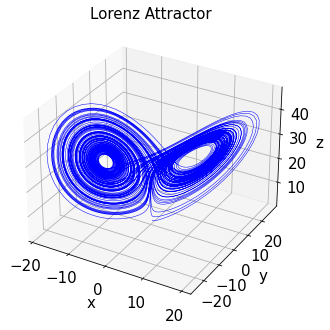

In [2]:
# Program 08b: The Lorenz attractor. See Figure 8.11.
# In this case, the odeint numerical solver was used to solve the ODE.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
x0, y0, z0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

def Lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations"""
    x, y, z = X
    dx = -sigma * (x - y)
    dy = rho*x - y - x*z
    dz = -beta*z + x*y
    return (dx, dy, dz)

# Integrate the Lorenz equations on the time grid t.
t = np.linspace(0, tmax, n)
f = odeint(Lorenz, (x0, y0, z0), t, args=(sigma, beta, rho))
x, y, z = f.T

# Plot the Lorenz attractor using a Matplotlib 3D projection.
fig = plt.figure()
ax = Axes3D(fig)

ax.plot(x, y, z, 'b-', lw=0.5)

ax.set_xlabel('x', fontsize=15)
ax.set_ylabel('y', fontsize=15)
ax.set_zlabel('z', fontsize=15)
plt.tick_params(labelsize=15)
ax.set_title('Lorenz Attractor', fontsize=15)

plt.show()

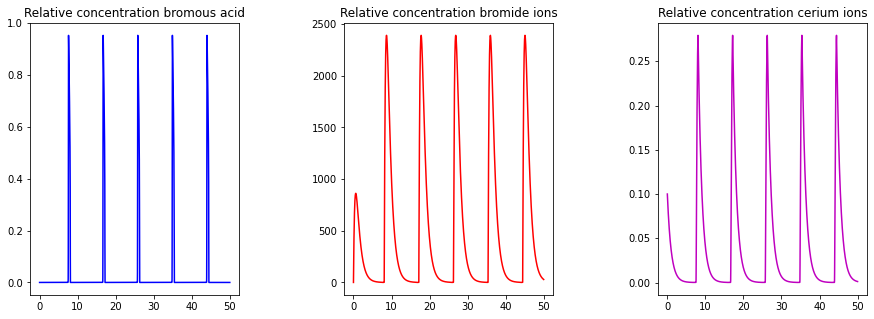

In [3]:
# Program 08c: The Belousov-Zhabotinski Reaction. See Figure 8.16.
# Plotting time series for a 3-dimensional ODE.

import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# B_Z parameters and initial conditions.
q, f, eps, delta = 3.1746e-5, 1, 0.0099, 2.4802e-5
x0, y0, z0 = 0, 0, 0.1

# Maximum time point and total number of time points.
tmax, n = 50, 10000

def bz_reaction(X, t, q, f, eps, delta):
    x, y, z = X
    dx = (q*y - x*y + x*(1-x)) / eps
    dy = (-q*y - x*y + f*z) / delta
    dz = x-z
    return (dx, dy, dz)

t = np.linspace(0, tmax, n)
f = odeint(bz_reaction, (x0, y0, z0), t, args=((q, f, eps, delta)))
x, y, z = f.T

# Plot time series.
fig = plt.figure(figsize=(15, 5))
fig.subplots_adjust(wspace=0.5, hspace=0.3)
ax1 = fig.add_subplot(1, 3, 1)
ax1.set_title('Relative concentration bromous acid', fontsize=12)
ax2 = fig.add_subplot(1, 3, 2)
ax2.set_title('Relative concentration bromide ions', fontsize=12)
ax3 = fig.add_subplot(1, 3, 3)
ax3.set_title('Relative concentration cerium ions', fontsize=12)

ax1.plot(t, x, 'b-')
ax2.plot(t, y, 'r-')
ax3.plot(t, z, 'm-')

plt.show()

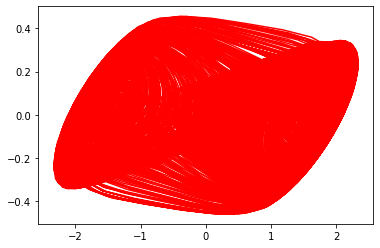

In [4]:
# Program 08d: Animation of a Chua circuit bifurcation.
# You can watch a YouTube animation on the web.
# Search for Chua circuit animated bifurcation.

from matplotlib import pyplot as plt
from matplotlib.animation import ArtistAnimation
import numpy as np
from scipy.integrate import odeint

fig = plt.figure()

m0 = -1/7
m1 = 2/7
tmax = 100

def chua(x, t):
    return [a * (x[1] - (m1*x[0] + (m0-m1) / 2 * (np.abs(x[0] + 1) - np.abs(x[0] - 1)))),
            x[0] - x[1] + x[2],
            -15*x[1]]

time = np.arange(0, tmax, 0.1)
x0=[1.96,-0.0519,-3.077]

myimages = []
for a in np.arange(8, 11, 0.1):
    xs = odeint(chua, x0, time)
    imgplot = plt.plot(xs[:, 0], xs[:, 1], 'r-')
    myimages.append(imgplot)

my_anim = ArtistAnimation(fig, myimages, interval=500, blit=False, repeat_delay=500)

plt.show()